slope:  -13712.160391730962
intercept:  -36.932553352620445
A [1/s]:  9.128425518196828e-17
Activation Energy [kJ/mol]:  114.00290149685122


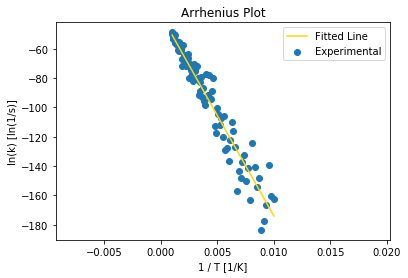

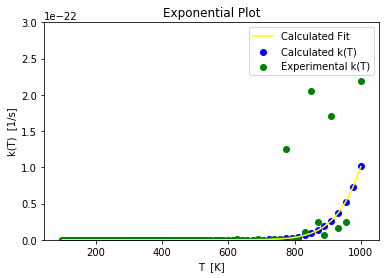

In [2]:
import numpy as np
import matplotlib as mpl

k_exp = np.loadtxt('kinetic_data.txt')
T = np.loadtxt('temperature_data.txt')

mpl.pyplot.figure()
mpl.pyplot.scatter(1 / T, np.log(k_exp), label='Experimental')
mpl.pyplot.title("Arrhenius Plot")
mpl.pyplot.ylabel("ln(k) [ln(1/s)]")
mpl.pyplot.xlabel("1 / T [1/K]")

x = 1. / T
y = np.log(k_exp)

from scipy.stats import linregress

slope, intercept, rval, pval, std_err = linregress(x,y)

log_k_fitted = slope * x + intercept

mpl.pyplot.plot(1 / T, log_k_fitted, color='gold', label='Fitted Line')

mpl.pyplot.legend()

mpl.pyplot.savefig('arrhenius_plot.png')

mpl.pyplot.figure()

A = np.exp(intercept)
E_act = -slope * 8.314 / 1000

calcd_k = A*np.exp(slope / T)
mpl.pyplot.ylim(0, 3e-22)
mpl.pyplot.scatter(T, calcd_k, color="blue", label='Calculated k(T)')
mpl.pyplot.plot(T, calcd_k, color="yellow", label='Calculated Fit')
mpl.pyplot.scatter(T, k_exp, color="green", label='Experimental k(T)')
mpl.pyplot.legend()
mpl.pyplot.title("Exponential Plot")
mpl.pyplot.ylabel("k(T)  [1/s]")
mpl.pyplot.xlabel("T  [K]")

mpl.pyplot.savefig('exp_plot.png')


print('slope: ', slope)
print('intercept: ', intercept)
print('A [1/s]: ', A)
print('Activation Energy [kJ/mol]: ', E_act)


As T gets larger, the term of the exponential gets less negative (approaches 1 from 0). As such, with all other things being equal, with increased T, the rate increases as well.
